In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed()

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Expand the display width

In [4]:
def display_theoretical_avg(arr,title):
    plt.hist(arr,color = 'purple')
    plt.title(title)
    print(np.nanmean(arr))

In [5]:
def generate_random_from_cumulative_dist(values_dict):
    random_number = np.random.rand()
    for key, value in values_dict.items():
        if random_number <= value:
            return key

In [6]:
def input_probability_distribution():
    lhs = []
    probabilities = []

    while True:
        lhs_value = float(input("Enter a value (or -1 to stop): "))
        if lhs_value == -1:
            break
        prob = float(input(f"Enter the probability for this value {lhs_value}: "))
        lhs.append(lhs_value)
        probabilities.append(prob)

    if not np.isclose(sum(probabilities), 1.0):
        raise ValueError("The sum of probabilities must be 1.")

    cumulative_probabilities = np.cumsum(probabilities).tolist()
    return {t: c for (t, c) in zip(lhs, cumulative_probabilities)}

In [7]:
rooms_dict = {1:0.1, 2: 0.25, 3:0.6, 4:0.8, 5:1}

lead_time_dict = {1:0.4, 2:0.75, 3:1}

choice = int(input("Choose 1 to enter new probability distributions: "))

if choice == 1:
    print("Enter probability distribution for the number of rooms occupied")
    rooms_dict = input_probability_distribution()
    print("Enter probability distribution for the lead time")
    lead_time_dict = input_probability_distribution()




Choose 1 to enter new probability distributions:  0


In [8]:
# Simulation parameters
number_of_runs = int(input("Enter number of Runs: "))
days = int(input("Enter number of days: "))
review_period = int(input("Enter the cycle length: "))

first_floor_max_capacity = int(input("Enter the first floor maximum capacity: "))
initial_first_floor_inventory = int(input("Enter the first floor initial capacity: "))

basement_max_capacity = int(input("Enter the basement maximum capacity: "))
initial_basement_inventory = int(input("Enter the basement initial capacity: "))

#  Cycle Length = 6
#  First Floor Max Capacity = 10
#  First Floor initial Capacity = 4
#  Basement Inventory Max Capacity = 30
#  Basement Inventory initial Capacity = 30

Enter number of Runs:  1000
Enter number of days:  1000
Enter the cycle length:  6
Enter the first floor maximum capacity:  10
Enter the first floor initial capacity:  4
Enter the basement maximum capacity:  30
Enter the basement initial capacity:  30


In [9]:
#Experimental Cell For Last two Questions
review_period = 6
basement_max_capacity = 32

In [19]:
# Experimental Averages
demand_averages = []
lead_time_averages = []
shortage_days_average = []

for r in range(number_of_runs):
    cycle_col = [0] * (days + 1)
    day_col = [0] * (days + 1)
    rooms_occupied = [0] * (days + 1)
    first_floor_start = [0] * (days + 1)
    basement_start = [0] * (days + 1)
    first_floor_end = [0] * (days + 1)
    first_floor_end[0] = initial_first_floor_inventory
    basement_end = [0] * (days + 1)
    basement_end[0] = initial_basement_inventory
    transferred = [0] * (days + 1)
    shortage = [0] * (days + 1)
    lead_time = [0] * (days + 1)
    lead_time_remaining = [0]
    order_quantity_col = [0] * (days + 1)
    
    # Order Variables
    current_order_quantity = 0
    order_arrives_at_day = 0

    # simulation for one table
    for day in range(1, days + 1):
        if day == order_arrives_at_day:
            basement_start[day] = basement_end[day - 1] + current_order_quantity

        cycle = (day - 1) // review_period + 1
        cycle_col[day] = cycle
        day_col[day] = day
        # Simulate number of rooms occupied
        demand = generate_random_from_cumulative_dist(rooms_dict)
        rooms_occupied[day] = demand

        # Record starting inventories
        first_floor_start[day] = first_floor_end[day - 1]
        if day != order_arrives_at_day:
            basement_start[day] = basement_end[day - 1]

        if demand <= first_floor_start[day]:
            first_floor_end[day] = first_floor_start[day] - demand
            basement_end[day] = basement_start[day]
        else:
            quantity = first_floor_max_capacity - first_floor_start[day]
            q_transferred = min(quantity, basement_start[day])
            transferred[day] = q_transferred
            first_floor_start[day] += q_transferred
            basement_end[day] = basement_start[day] - q_transferred

            if demand <= first_floor_start[day]:
                first_floor_end[day] = first_floor_start[day] - demand
                basement_start[day] = basement_end[day-1]
            else:
                remaining_demand = demand - first_floor_start[day]
                first_floor_end[day] = 0
                basement_end[day] = 0
                # there is shortage in this day
                shortage[day] = remaining_demand

        lead_time_remaining.append(lead_time_remaining[day - 1])

        if day % review_period == 0:
            current_order_quantity = basement_max_capacity - basement_end[day]
            order_quantity_col[day] = current_order_quantity
            lead_time[day] = generate_random_from_cumulative_dist(lead_time_dict)
            order_arrives_at_day = lead_time[day] + day + 1
            lead_time_remaining[day] = (lead_time[day]) + 1
        lead_time_remaining[day] -= 1

    demand_averages.append(sum(rooms_occupied[1:])/days)
    lead_time_averages.append(sum(lead_time[1:])/(days//review_period))
    shortage_days_average.append(sum(1 if i > 0 else 0 for i in shortage[1:] ))

In [20]:
print(f"Experimental Average of the lead time is : {np.mean(lead_time_averages)}")
print(f"Experimental Average of the demand is : {np.mean(demand_averages)}")
print(f"number of days when shortage occurs: {sum(1 if i > 0 else 0 for i in shortage[1:] )}")

Experimental Average of the lead time is : 1.8494698795180722
Experimental Average of the demand is : 3.250428
number of days when shortage occurs: 3


1.8494698795180722


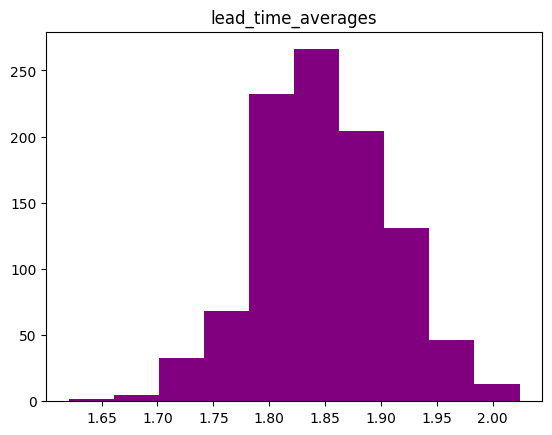

In [21]:
display_theoretical_avg(lead_time_averages,'lead_time_averages')

3.250428


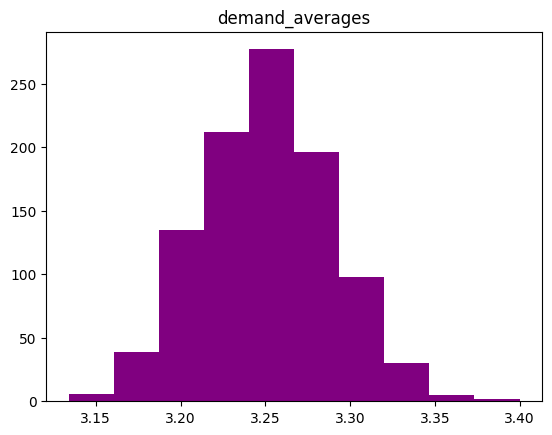

In [22]:
display_theoretical_avg(demand_averages,'demand_averages')

2.738


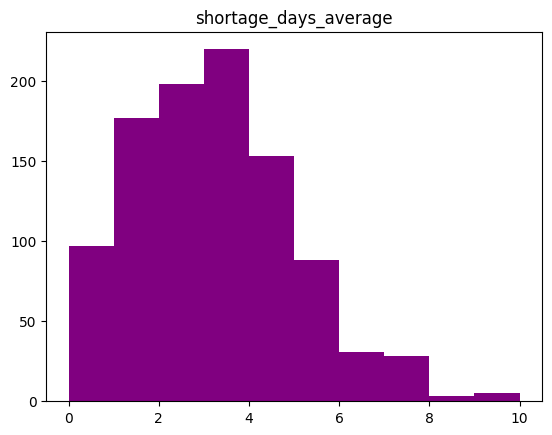

In [23]:
display_theoretical_avg(shortage_days_average,'shortage_days_average')

In [15]:
lead_time_remaining[1:] = [max(0, value) for value in lead_time_remaining[1:]]
simulation_table = {
        "Cycle": cycle_col[1:],
        "Day": day_col[1:],
        "Rooms Occupied": rooms_occupied[1:],
        "First Floor Inventory (Start)": first_floor_start[1:],
        "First Floor Inventory (End)": first_floor_end[1:],
        "Basement Inventory (Start)": basement_start[1:],
        "Boxes Transferred from Basement": transferred[1:],
        "Basement Inventory (End)": basement_end[1:],
        "Shortage Quantity": shortage[1:],
        "Lead Time": lead_time[1:],
        "Order Quantity": order_quantity_col[1:],
        "Days Until Order Arrive": lead_time_remaining[1:]
    }

# Convert to DataFrame for tabular display
simulation_df = pd.DataFrame(simulation_table)

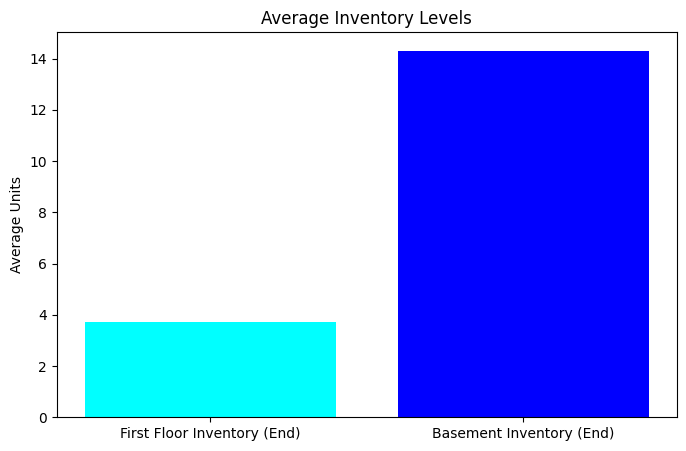

[3.7372627372627374, 14.316683316683317]


In [16]:
# Calculate averages
avg_first_floor_end = sum(first_floor_end) / len(first_floor_end)
avg_basement_end = sum(basement_end) / len(basement_end)

# Prepare data for plotting
categories = ['First Floor Inventory (End)', 'Basement Inventory (End)']
averages = [avg_first_floor_end, avg_basement_end]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, averages, color=['cyan', 'blue'])
plt.title('Average Inventory Levels')
plt.ylabel('Average Units')
plt.show()
print(averages)

[3, 997]


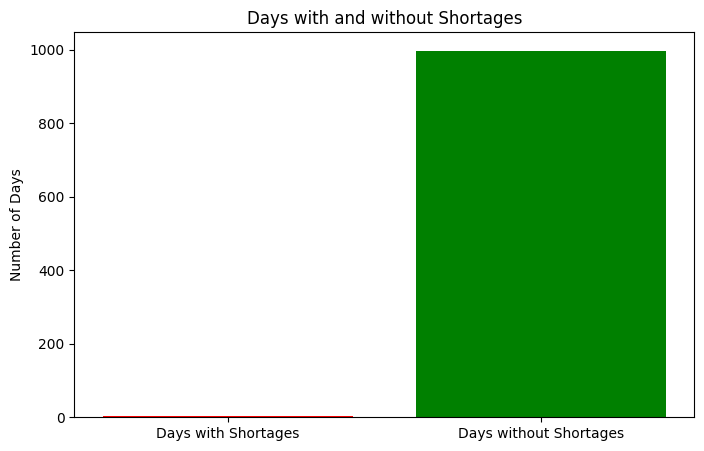

In [17]:
days_with_shortages = sum(1 for s in shortage[1:] if s > 0)
days_without_shortages = len(shortage[1:]) - days_with_shortages

# Prepare data for plotting
categories = ['Days with Shortages', 'Days without Shortages']
values = [days_with_shortages, days_without_shortages]
print(values)
# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['red', 'green'])
plt.title('Days with and without Shortages')
plt.ylabel('Number of Days')
plt.show()

In [18]:
simulation_df.to_excel("Problem2Output.xlsx",index = False)